In [44]:
import torch 
import torch.nn as nn 

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import gaussian_kde

import bayesianMarkovKernel as bmk

In [45]:
transition_matrix = torch.tensor([[0.8, 0.2], [0.4, 0.6], [0.5, 0.3]], dtype = torch.float32)
markov_kernel = bmk.MarkovKernel(transition_matrix)
bayesian_inverter = bmk.BayesianInverter(2, 3)

input_data = torch.tensor([[0.7, 0.3, 0.5], [0.2, 0.8, 0.9], [0.7, 0.6, 0.1]], dtype = torch.float32)
output = bmk.compose(markov_kernel, bayesian_inverter).apply(input_data)

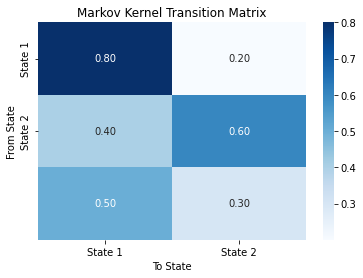

In [46]:
sns.heatmap(transition_matrix, annot = True, cmap = "Blues", fmt = ".2f", 
            xticklabels = ["State 1", "State 2"], yticklabels = ["State 1", "State 2"])
plt.title("Markov Kernel Transition Matrix")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

In [47]:
from torchsummary import summary

input_dim = 2
output_dim = 3 

summary(bayesian_inverter.model, (input_dim, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]             384
              ReLU-2                  [-1, 128]               0
            Linear-3                    [-1, 3]             387
           Sigmoid-4                    [-1, 3]               0
Total params: 771
Trainable params: 771
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


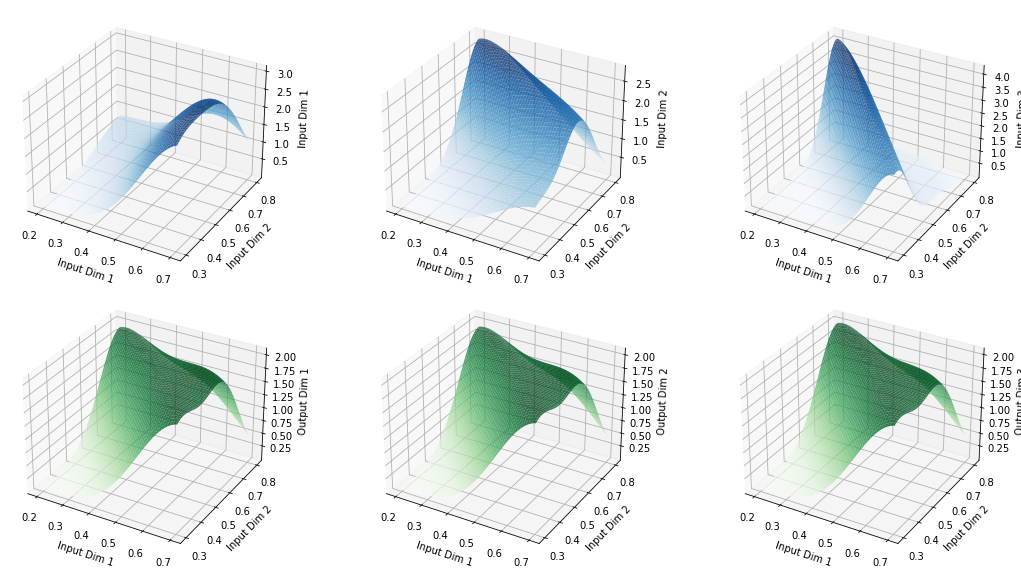

In [49]:
fig = plt.figure(figsize = (16, 8))

for i in range(input_data.shape[1]):
    ax = fig.add_subplot(2, 3, i + 1, projection = '3d')
    x = input_data[:, 0].numpy()
    y = input_data[:, 1].numpy()
    z = input_data[:, i].numpy()

    x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100),
                                    np.linspace(min(y), max(y), 100))
    kde = gaussian_kde([x, y], weights = z)
    z_grid = kde.evaluate([x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'Blues', alpha = 0.8)
    ax.set_xlabel("Input Dim 1")
    ax.set_ylabel("Input Dim 2")
    ax.set_zlabel(f"Input Dim {i + 1}")

for i in range(output.shape[1]):
    ax = fig.add_subplot(2, 3, i + 4, projection = '3d')
    x = input_data[:, 0].numpy()
    y = input_data[:, 1].numpy()
    z = output[:, i].detach().numpy()

    x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100),
                                    np.linspace(min(y), max(y), 100))
    kde = gaussian_kde([x, y], weights = z)
    z_grid = kde.evaluate([x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'Greens', alpha = 0.8)
    ax.set_xlabel("Input Dim 1")
    ax.set_ylabel("Input Dim 2")
    ax.set_zlabel(f"Output Dim {i + 1}")

plt.tight_layout()
plt.show()